In [143]:
import pandas as pd
from imblearn.combine import SMOTETomek
from table_evaluator import TableEvaluator

In [144]:
# Read the csv file into a dataframe
df = pd.read_csv('insurance.csv')
categorical_features = ['age','sex','children','smoker','region']
# Separate the features and the target variable
X = df.drop('smoker', axis=1)
y = df['smoker']

In [145]:
# Encode the categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=['sex', 'region'])

# Create a SMOTE TOMEK object with random_state=42
smt = SMOTETomek(random_state=42)

# Apply SMOTE TOMEK to generate synthetic data
X_res, y_res = smt.fit_resample(X, y)

In [146]:
# Create a new dataframe with the synthetic data
df_res = pd.concat([X_res, y_res], axis=1)

In [147]:
# Save the new dataframe as a csv file
df_res.to_csv('insurance_smote_tomek.csv', index=False)

(1338, 11) (2060, 11)


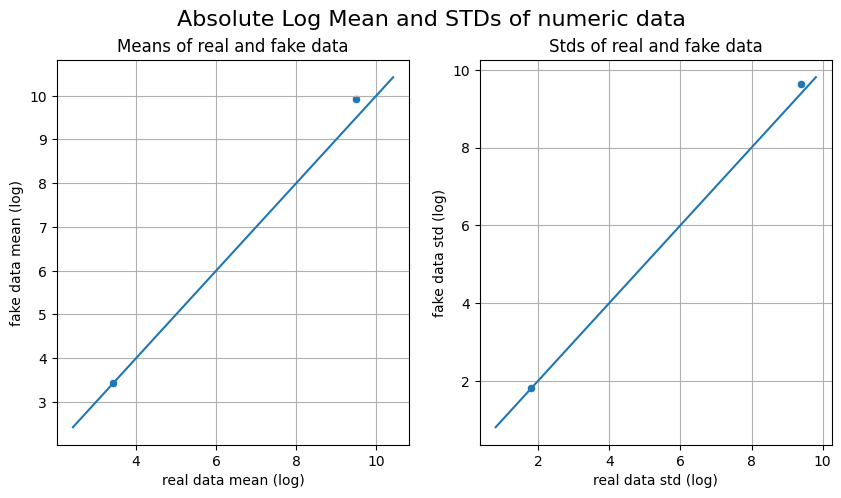

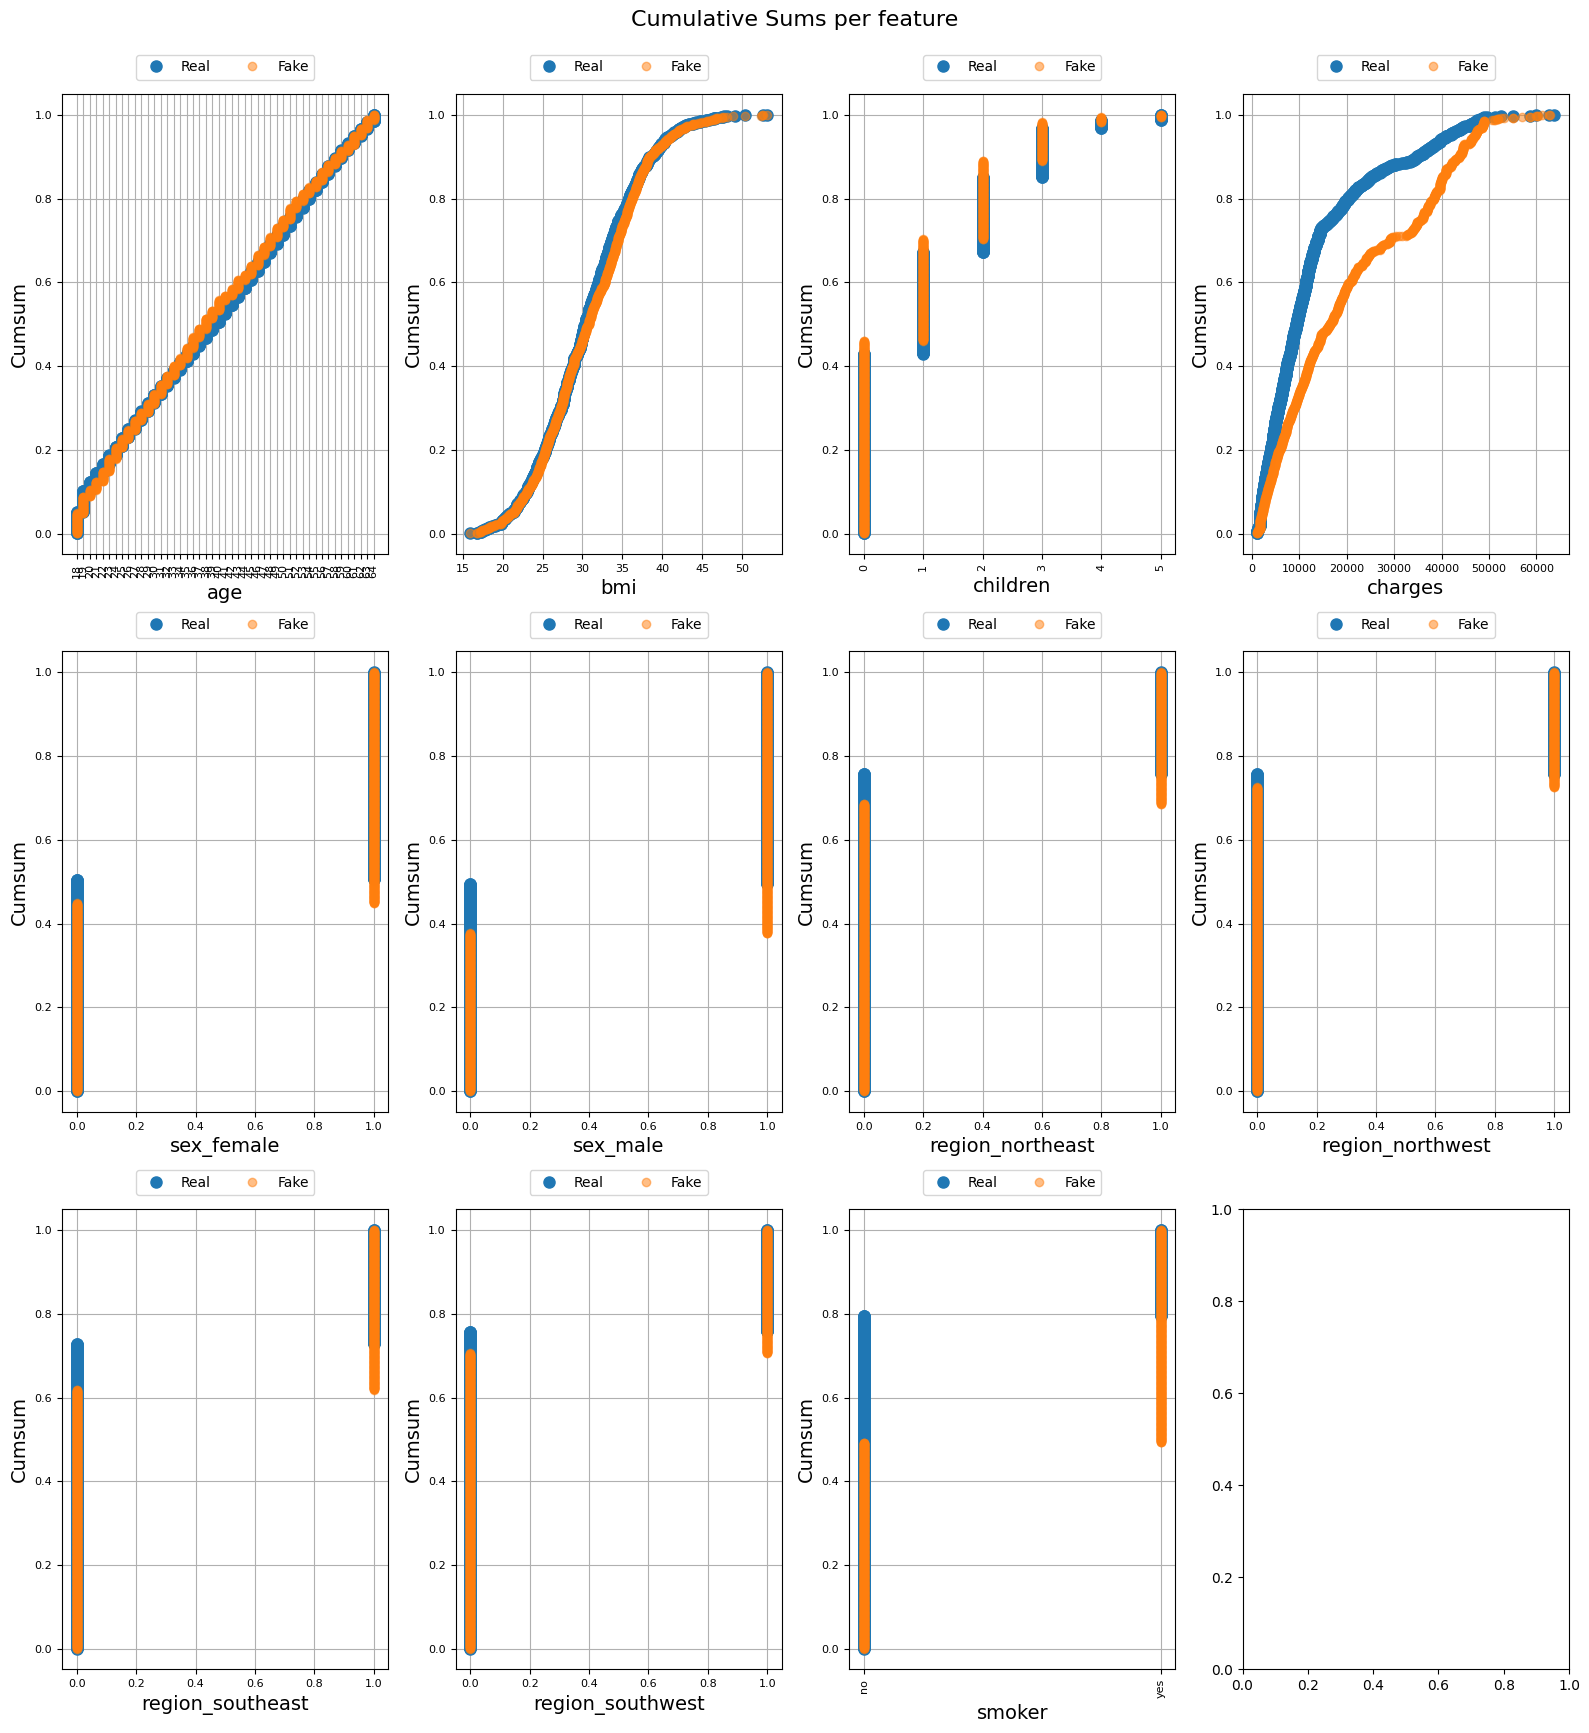

c:\Users\Arijit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
c:\Users\Arijit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
c:\Users\Arijit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
c:\Users\Arijit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
 

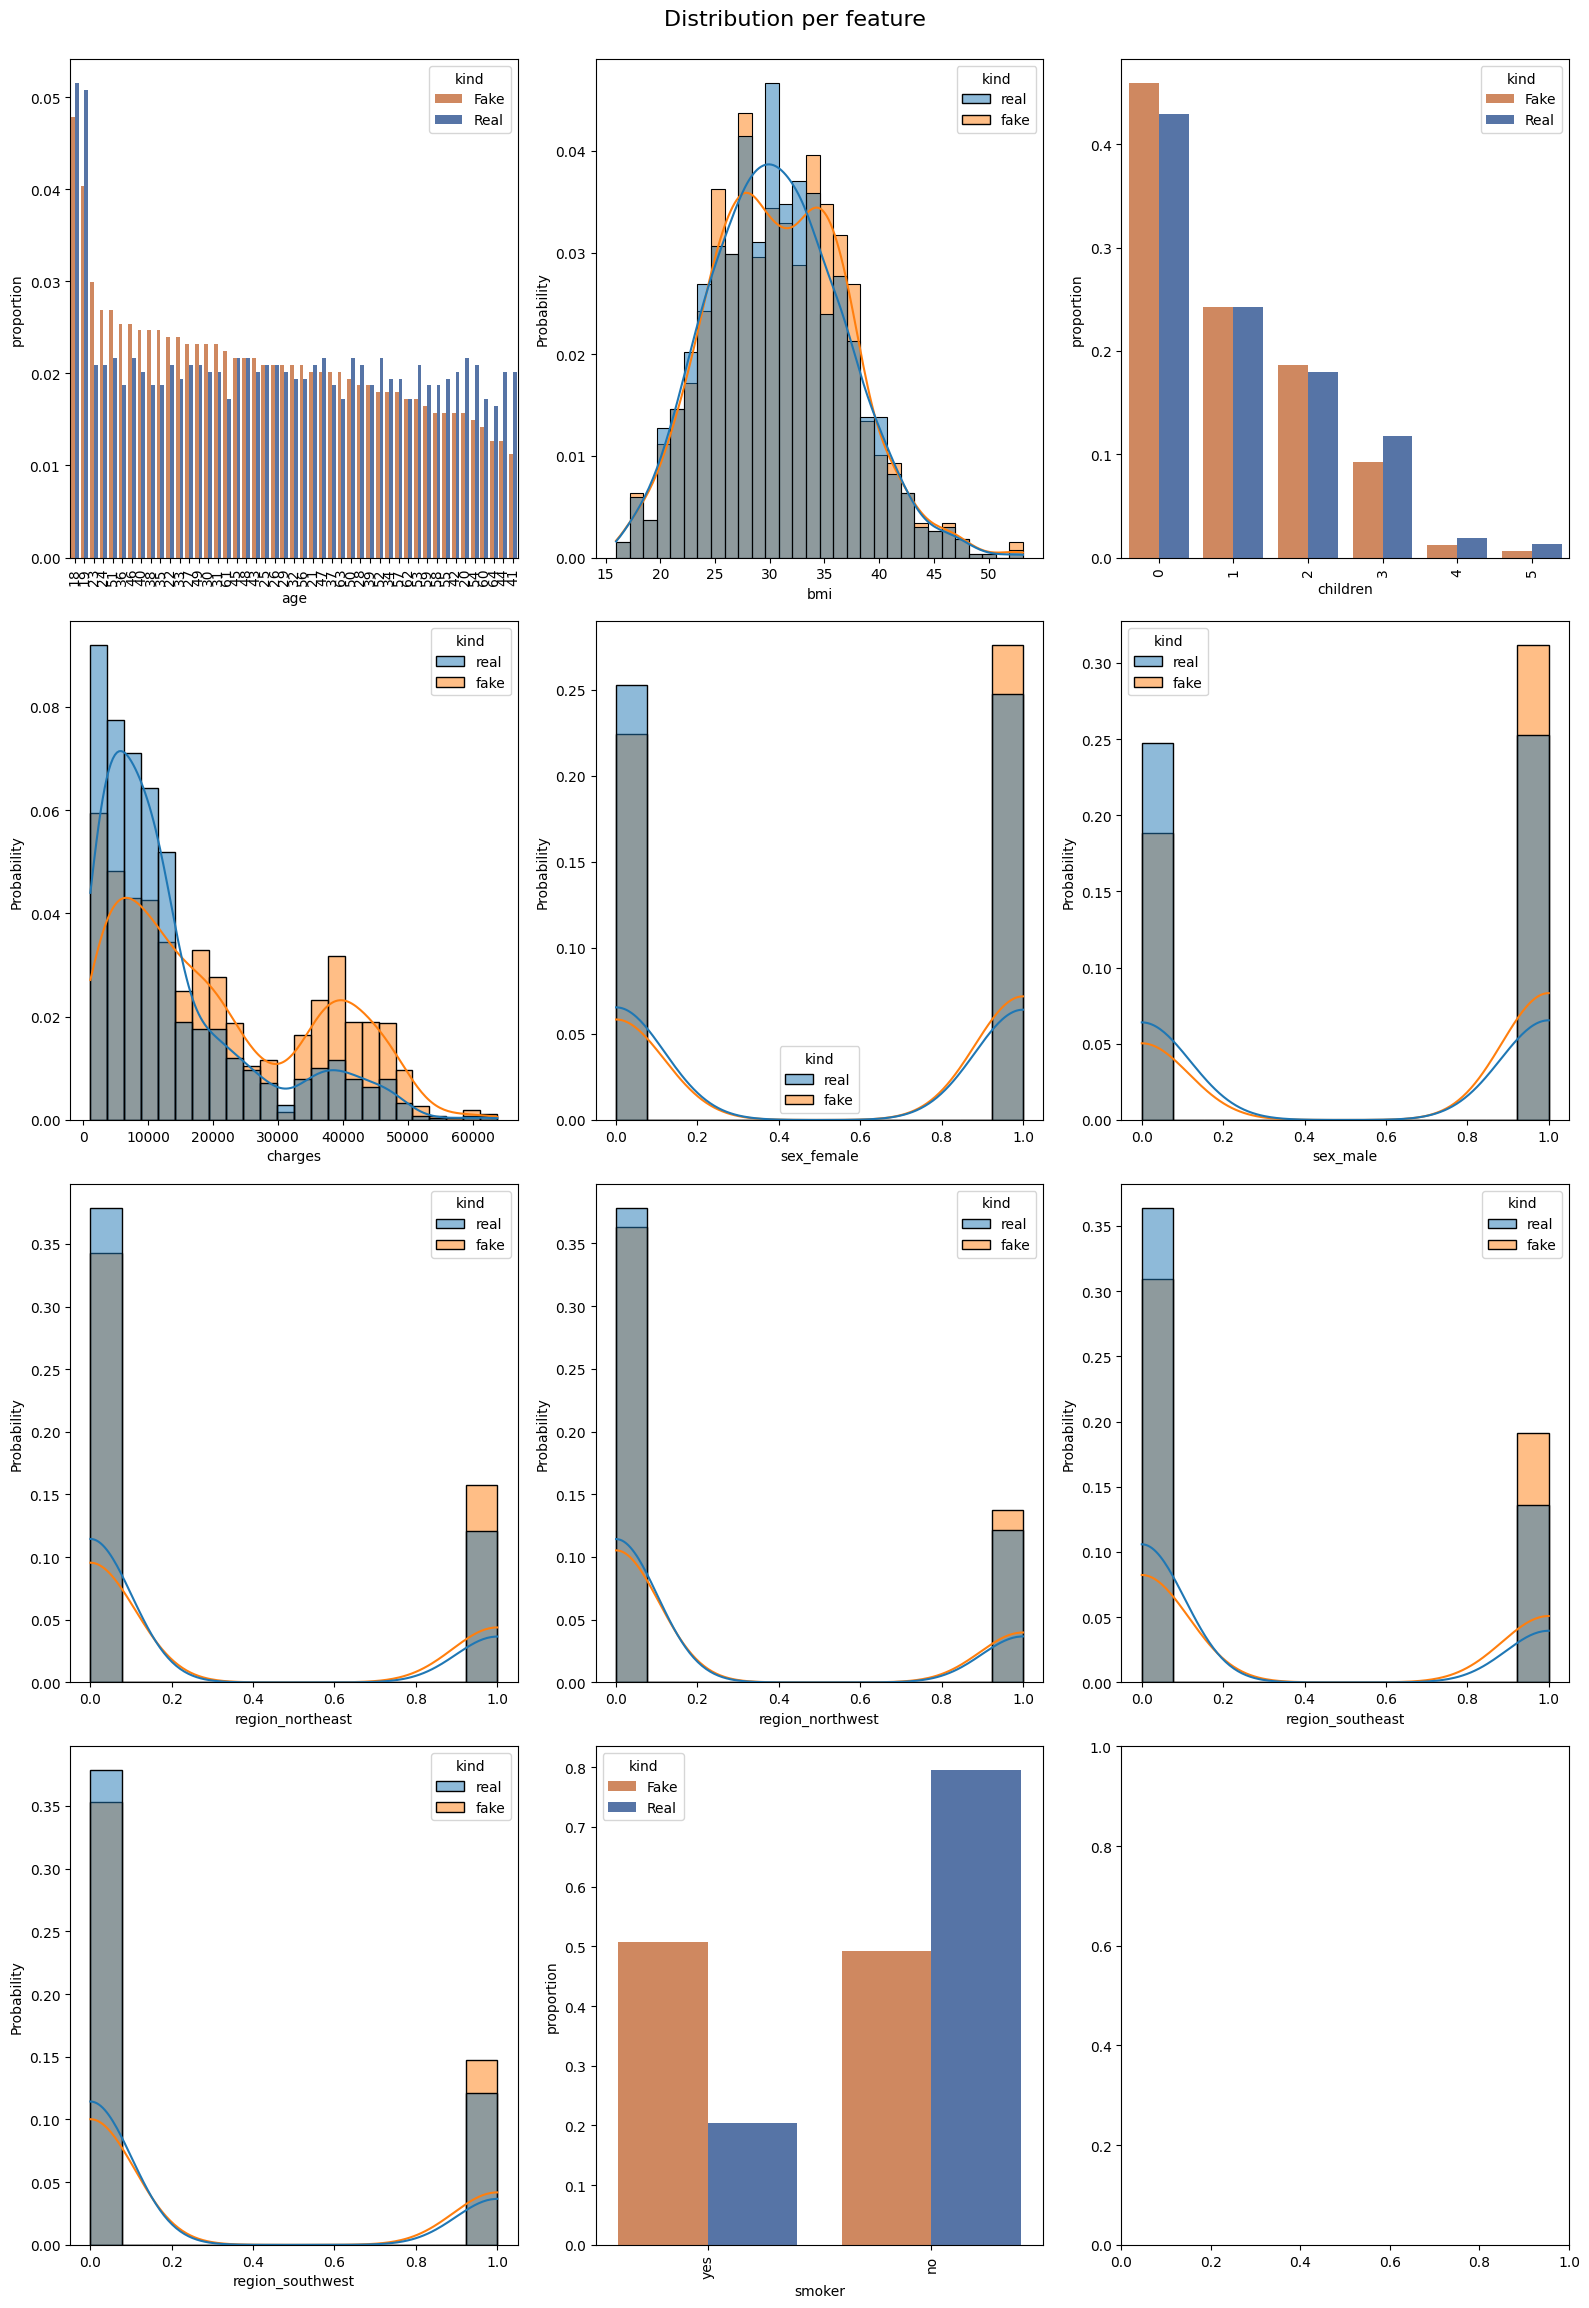

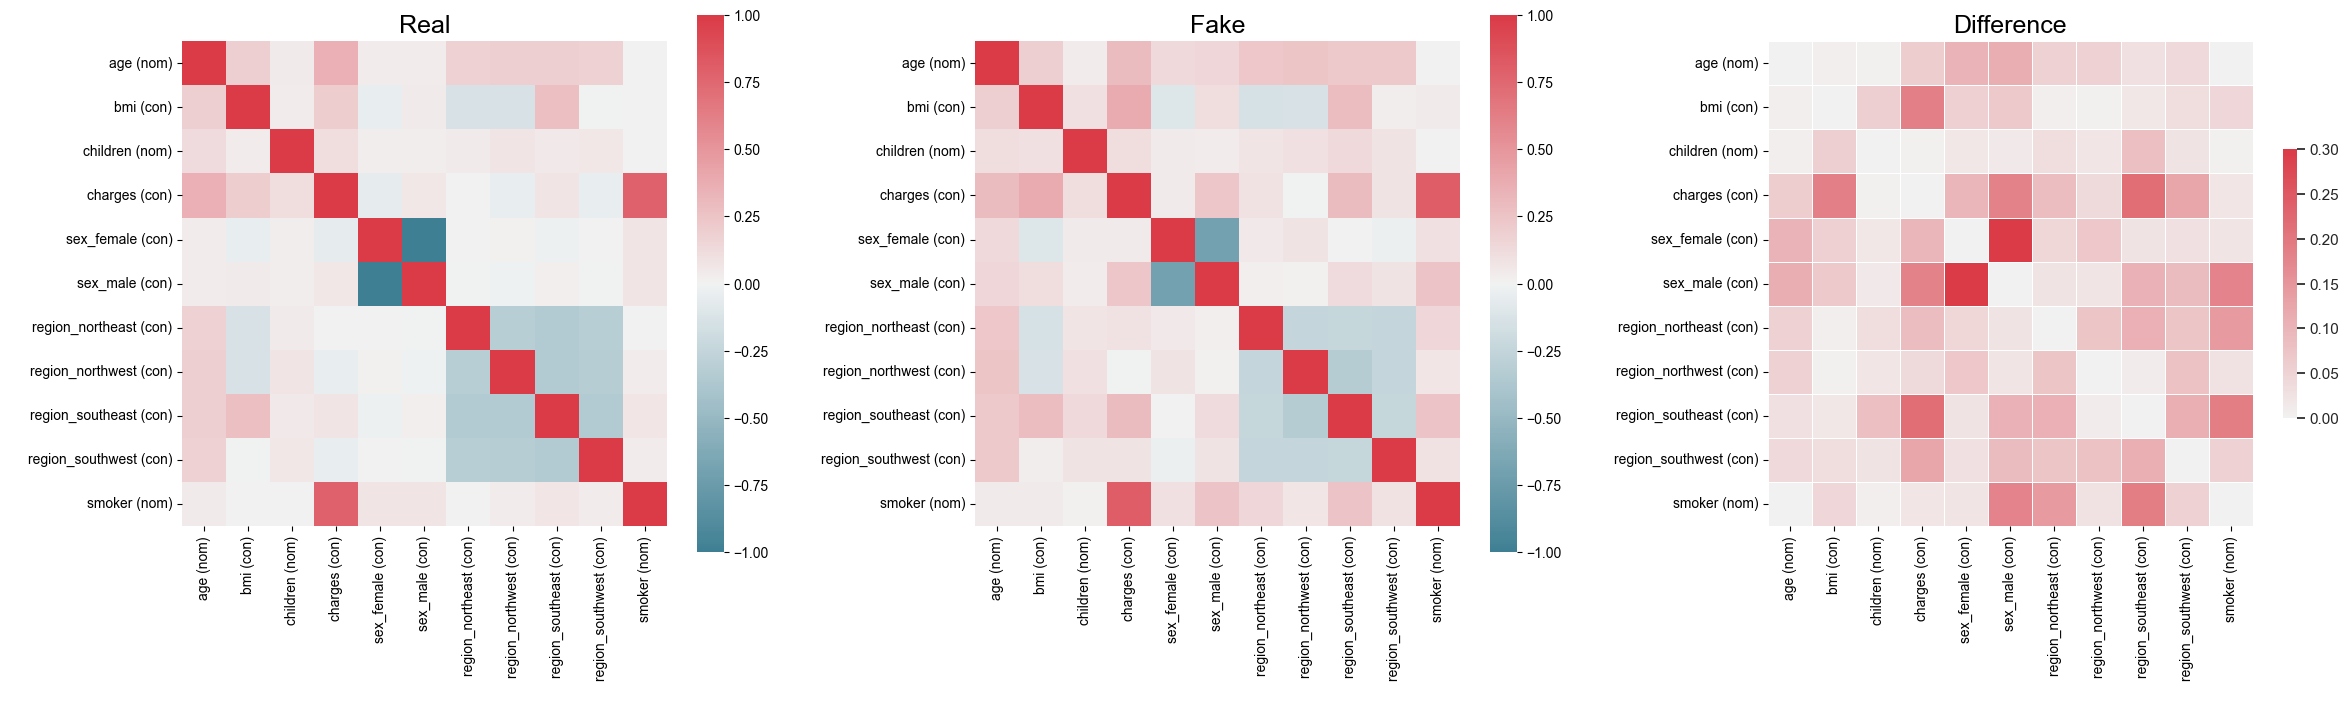

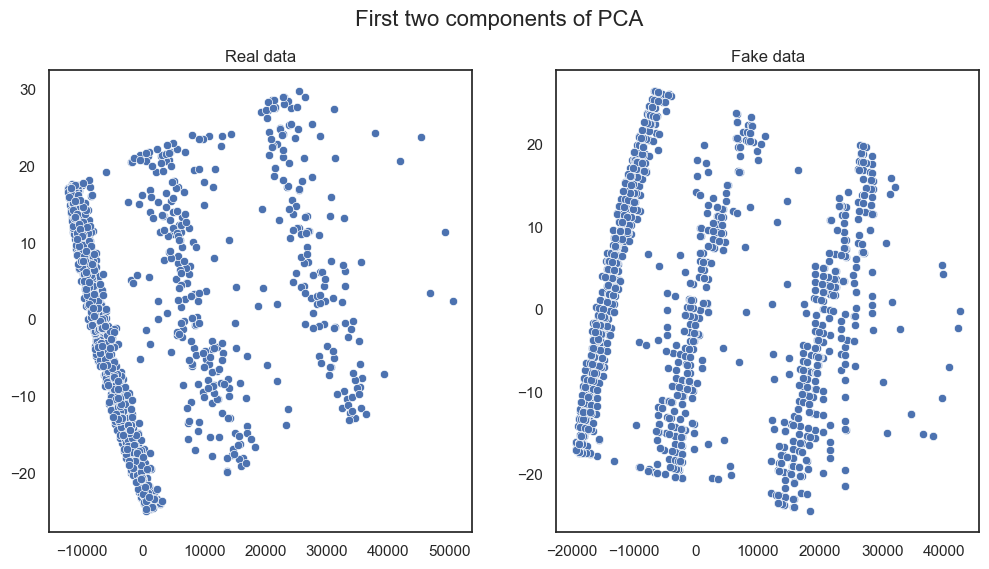

In [2]:
import pandas as pd
from table_evaluator import TableEvaluator
categorical_features = ['age','children','smoker']
df = pd.read_csv('insurance_coded.csv')
df_syn = pd.read_csv('insurance_smote_tomek.csv')
print(df.shape, df_syn.shape)
table_evaluator =  TableEvaluator(df, df_syn, cat_cols= categorical_features)
table_evaluator.visual_evaluation()
